# MyRatracer - Performane

Testing how changing some lines might affect performance and how different initializations, such as number of rays and max depth, scale up the time required for rendering. A first significant improvement (almost 30% speed up) by substituting the taxing calculation of $2^{32}$ by its result and not printing the percentage to completion.

## Number of rays

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

In [3]:
n_r = np.array([1, 2, 3, 4, 5, 7, 17, 20])
t_ms = np.array([1568, 2336, 3310, 4646, 7073, 13992, 90541, 132559])

In [24]:
def func(x, a, b, c):
    return a * x ** 2 + b * x + c

In [25]:
popt, pcov = curve_fit(func, n_r, t_ms)

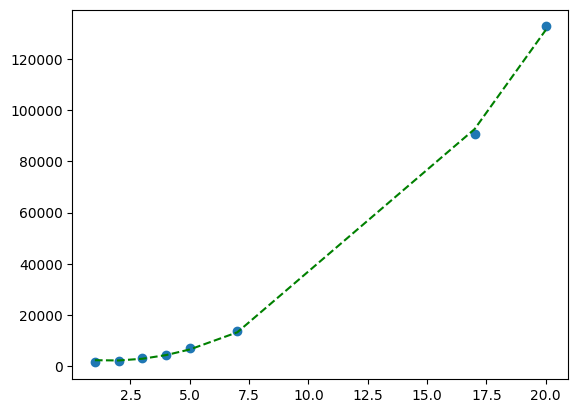

In [26]:
plt.scatter(n_r, t_ms)
plt.plot(n_r, func(n_r, *popt), 'g--',
         label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

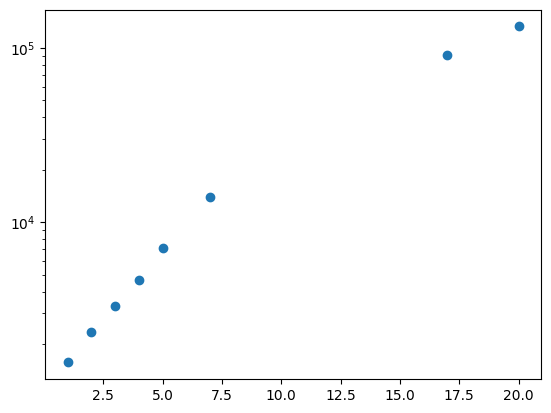

In [33]:
plt.scatter(n_r, t_ms)
plt.yscale("log")

In [28]:
def nrays_to_time(n_r, option):
    time = func(n_r, *popt)
    if (option == "ms"):
        time = time
    elif (option == "s"):
        time /= 1000
    elif (option == "m"):
        time /= 1000*60
    elif (option == "h"):
        time /= 1000*3600
    return time

In [34]:
nrays_to_time(15, "s")

70.59887295269974